<a href="https://colab.research.google.com/github/Marlyn77/RedNeuronal/blob/main/PRInforme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
from PIL import Image
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import cv2

In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import TensorBoard
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
def preprocesamiento(ruta, imag_size):
  #Aumentar el numero de datos
  datagen = ImageDataGenerator(
      rotation_range = 20,
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip = True,
      fill_mode = 'nearest'
  )

  imagenes = []
  for img in os.listdir(ruta):
    img = cv2.imread(os.path.join(ruta, img), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (imag_size, imag_size))
    img = img.astype('float32')/255.0

    #anadir una dimesion extra para los canales
    img = np.expand_dims(img, axis=-1)

    #Aumentar la imagen (crea 5 a partir de la original)
    it = datagen.flow(img[np.newaxis], batch_size=1)
    for i in range(5):
      batch = it.next()
      imagenes.append(batch[0, :, :, 0])

  return np.array(imagenes)

In [7]:
#Tamanos de las imagenes
imag_size = 256

In [8]:
#Sano
ruta = '/content/drive/MyDrive/CafeB/Train/Sano'
sano = preprocesamiento(ruta, imag_size)
print(sano.shape)

#Enfermas
ruta = '/content/drive/MyDrive/CafeB/Train/Enfermas'
enfermas = preprocesamiento(ruta, imag_size)
print(enfermas.shape)

#Concatenacion
images = np.concatenate([sano, enfermas])
images = np.expand_dims(images, axis=-1)
print(images.shape)

#Etiquetas
etiqueta_sano = np.repeat(0, sano.shape[0])
etiqueta_enfermas = np.repeat(1, enfermas.shape[0])

#Clase
class_names = ['Sano', 'Enfermas']
labels = np.concatenate([etiqueta_sano, etiqueta_enfermas])

(530, 256, 256)
(3655, 256, 256)
(4185, 256, 256, 1)


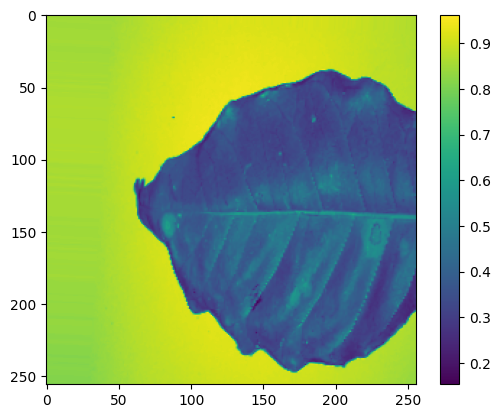

In [9]:
plt.figure()
plt.imshow(images[800])
plt.colorbar()
plt.grid(False)
plt.show()


In [10]:
#Sano
ruta_val = '/content/drive/MyDrive/CafeB/Val/Sano'
sano_val = preprocesamiento(ruta_val, imag_size)
print(sano_val.shape)

#Enfermas
ruta_val = '/content/drive/MyDrive/CafeB/Val/Enfermas'
enfermas_val = preprocesamiento(ruta_val, imag_size)
print(enfermas_val.shape)

#Concatenacion
images_val = np.concatenate([sano_val, enfermas_val])
images_val = np.expand_dims(images_val, axis=-1)
print(images_val.shape)

#Etiquetas
etiqueta_sano_val = np.repeat(0, sano_val.shape[0])
etiqueta_enfermas_val = np.repeat(1, enfermas_val.shape[0])

#Clase
class_names = ['Sano', 'Enfermas']
labels_val = np.concatenate([etiqueta_sano_val, etiqueta_enfermas_val])

(75, 256, 256)
(465, 256, 256)
(540, 256, 256, 1)


In [11]:
from posix import listdir
def preprocesamiento_test(ruta, imag_size):
  imagenes = []
  for img in os.listdir(ruta):
    img = cv2.imread(os.path.join(ruta,img), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (imag_size, imag_size))
    img = img.astype('float32')/255.0

    #Anadir una dimencion extra para los canales de color
    img = np.expand_dims(img, axis=-1)
    imagenes.append(img)
  return np.array(imagenes)

In [12]:
#Sano
ruta_test = '/content/drive/MyDrive/CafeB/Test/Sano'
sano_test = preprocesamiento(ruta_test, imag_size)
print(sano_test.shape)

#Enfermas
ruta_test = '/content/drive/MyDrive/CafeB/Val/Enfermas'
enfermas_test = preprocesamiento(ruta_test, imag_size)
print(enfermas_test.shape)

#Concatenacion
images_test = np.concatenate([sano_test, enfermas_test])
images_test = np.expand_dims(images_test, axis=-1)
print(images_test.shape)

#Etiquetas
etiqueta_sano_test = np.repeat(0, sano_test.shape[0])
etiqueta_enfermas_test = np.repeat(1, enfermas_test.shape[0])

#Clase
class_names = ['Sano', 'Enfermas']
labels_test = np.concatenate([etiqueta_sano_test, etiqueta_enfermas_test])

(115, 256, 256)
(465, 256, 256)
(580, 256, 256, 1)


In [13]:
BATCH_SIZE = 32
imag_size = 256
CHANNELS=1

In [14]:
input_shape = (BATCH_SIZE, imag_size, imag_size, CHANNELS)
n_classes = 2
EPOCHS = 20

model_1BSA = models.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(256,256,1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model_1BSP = models.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(256,256,1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(n_classes, activation='sigmoid'),
])




In [22]:
model_1BSA.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model_1BSP.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)



In [16]:
tensorboardModel1BSA = TensorBoard(log_dir='logs/model_1BSA')

history1 = model_1BSA.fit(
    images,
    labels,
    batch_size=BATCH_SIZE,
    validation_data = (images_val, labels_val),
    epochs=EPOCHS,
    callbacks=[tensorboardModel1BSA]
)

Epoch 1/20
131/131 [==============================] - 18s 44ms/step - loss: 0.3969 - accuracy: 0.8734 - val_loss: 0.3681 - val_accuracy: 0.8611
Epoch 2/20
131/131 [==============================] - 4s 31ms/step - loss: 0.3648 - accuracy: 0.8734 - val_loss: 0.3567 - val_accuracy: 0.8611
Epoch 3/20
131/131 [==============================] - 4s 30ms/step - loss: 0.3389 - accuracy: 0.8734 - val_loss: 0.3440 - val_accuracy: 0.8537
Epoch 4/20
131/131 [==============================] - 4s 33ms/step - loss: 0.3149 - accuracy: 0.8765 - val_loss: 0.3784 - val_accuracy: 0.8278
Epoch 5/20
131/131 [==============================] - 4s 31ms/step - loss: 0.2575 - accuracy: 0.8941 - val_loss: 0.3556 - val_accuracy: 0.8370
Epoch 6/20
131/131 [==============================] - 4s 30ms/step - loss: 0.2180 - accuracy: 0.9066 - val_loss: 0.4024 - val_accuracy: 0.8296
Epoch 7/20
131/131 [==============================] - 4s 32ms/step - loss: 0.1799 - accuracy: 0.9264 - val_loss: 0.4197 - val_accuracy: 0.835

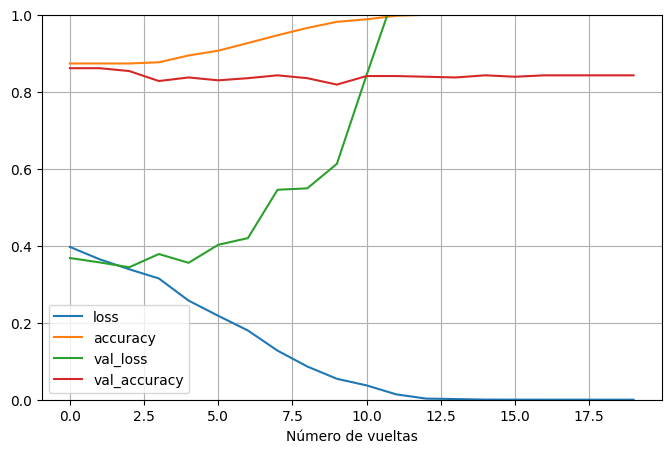

In [17]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)                                  #Establece el rango vertical en [0, 1]
plt.xlabel("Número de vueltas")
plt.show()

In [24]:
import gc
gc.collect()

2892

19/19 [==============================] - 0s 11ms/step


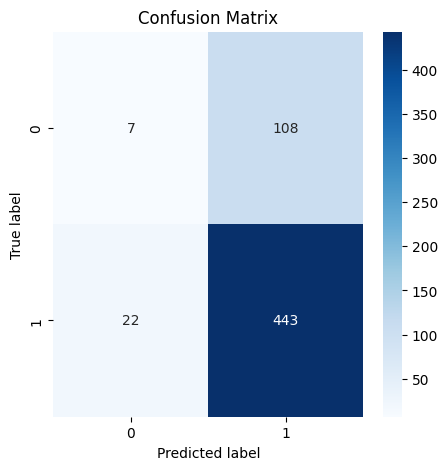

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Predecir las clases para el conjunto de validación
y_pred = model_1BSA.predict(images_test)
y_pred_classes = np.argmax(y_pred, axis=1)                                      #Elige la clase con la probabilidad más alta

#Calcular la matriz de confusión
cm = confusion_matrix(labels_test, y_pred_classes)

#Mostrar la matriz de confusión
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [25]:
tensorboardModel1BSP = TensorBoard(log_dir='logs/model_1BSP')

history2 = model_1BSP.fit(
    images,
    labels,
    batch_size=BATCH_SIZE,
    validation_data = (images_val, labels_val),
    epochs=EPOCHS,
    callbacks=[tensorboardModel1BSP]
)

Epoch 1/20
131/131 [==============================] - 5s 34ms/step - loss: 0.3738 - accuracy: 0.8734 - val_loss: 0.3689 - val_accuracy: 0.8611
Epoch 2/20
131/131 [==============================] - 4s 32ms/step - loss: 0.3601 - accuracy: 0.8729 - val_loss: 0.3690 - val_accuracy: 0.8611
Epoch 3/20
131/131 [==============================] - 4s 32ms/step - loss: 0.3402 - accuracy: 0.8731 - val_loss: 0.3464 - val_accuracy: 0.8574
Epoch 4/20
131/131 [==============================] - 4s 32ms/step - loss: 0.3107 - accuracy: 0.8748 - val_loss: 0.3451 - val_accuracy: 0.8593
Epoch 5/20
131/131 [==============================] - 4s 31ms/step - loss: 0.2616 - accuracy: 0.8882 - val_loss: 0.3666 - val_accuracy: 0.8444
Epoch 6/20
131/131 [==============================] - 4s 32ms/step - loss: 0.2429 - accuracy: 0.8953 - val_loss: 0.3829 - val_accuracy: 0.8537
Epoch 7/20
131/131 [==============================] - 4s 33ms/step - loss: 0.1942 - accuracy: 0.9223 - val_loss: 0.4011 - val_accuracy: 0.8185

In [26]:
import gc
gc.collect()


2041

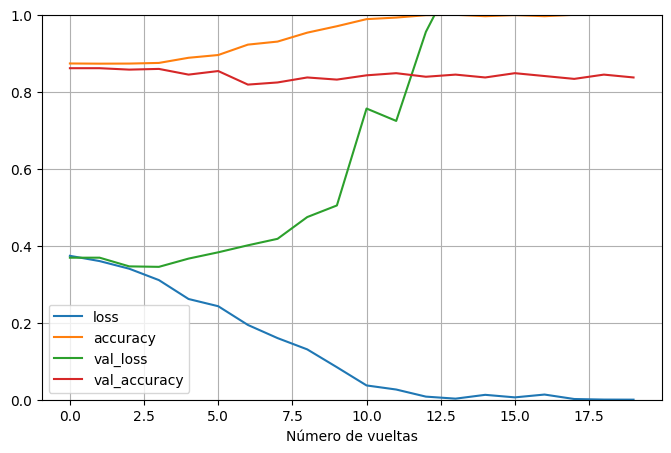

In [27]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)                                  #Establece el rango vertical en [0, 1]
plt.xlabel("Número de vueltas")
plt.show()

19/19 [==============================] - 0s 11ms/step


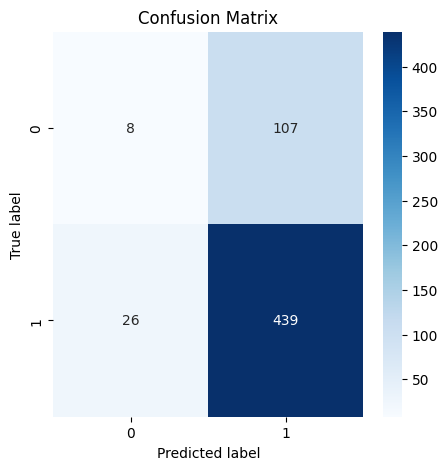

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Predecir las clases para el conjunto de validación
y_pred = model_1BSP.predict(images_test)
y_pred_classes = np.argmax(y_pred, axis=1)                                      #Elige la clase con la probabilidad más alta

#Calcular la matriz de confusión
cm = confusion_matrix(labels_test, y_pred_classes)

#Mostrar la matriz de confusión
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Modelo 2B

In [29]:
model_2BX = models.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(256,256,1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [30]:
model_2BX.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [31]:
tensorboardModel2BX = TensorBoard(log_dir='logs/model_2BX')

history3 = model_2BX.fit(
    images,
    labels,
    batch_size=BATCH_SIZE,
    validation_data = (images_val, labels_val),
    epochs=EPOCHS,
    callbacks=[tensorboardModel1BSP]
)

Epoch 1/20
131/131 [==============================] - 8s 41ms/step - loss: 0.3842 - accuracy: 0.8669 - val_loss: 0.4031 - val_accuracy: 0.8611
Epoch 2/20
131/131 [==============================] - 5s 36ms/step - loss: 0.3693 - accuracy: 0.8729 - val_loss: 0.3682 - val_accuracy: 0.8611
Epoch 3/20
131/131 [==============================] - 5s 34ms/step - loss: 0.3423 - accuracy: 0.8734 - val_loss: 0.3595 - val_accuracy: 0.8519
Epoch 4/20
131/131 [==============================] - 5s 40ms/step - loss: 0.3215 - accuracy: 0.8736 - val_loss: 0.4125 - val_accuracy: 0.8611
Epoch 5/20
131/131 [==============================] - 5s 38ms/step - loss: 0.3134 - accuracy: 0.8738 - val_loss: 0.3601 - val_accuracy: 0.8519
Epoch 6/20
131/131 [==============================] - 4s 34ms/step - loss: 0.2694 - accuracy: 0.8808 - val_loss: 0.3539 - val_accuracy: 0.8278
Epoch 7/20
131/131 [==============================] - 5s 34ms/step - loss: 0.2750 - accuracy: 0.8867 - val_loss: 0.4498 - val_accuracy: 0.8574

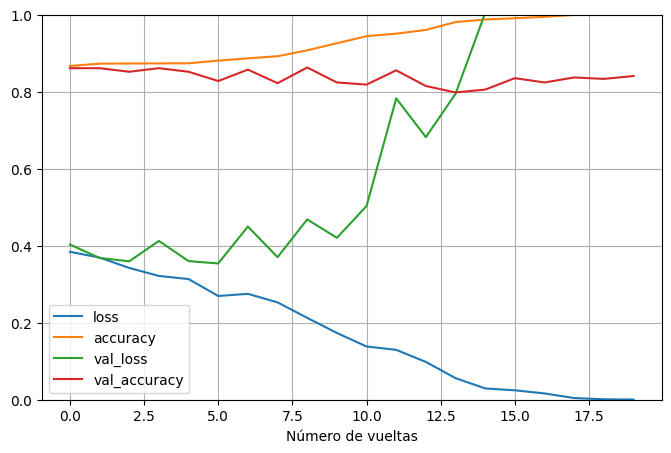

In [32]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)                                  #Establece el rango vertical en [0, 1]
plt.xlabel("Número de vueltas")
plt.show()

In [33]:
import gc
gc.collect()


5830

Modelo 3B


In [35]:
model_3BX = models.Sequential([
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(256, 256, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    ])

In [36]:
model_3BX.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [37]:
tensorboardModel3BX = TensorBoard(log_dir='logs/model_3BX')

history4 = model_3BX.fit(
    images,
    labels,
    batch_size=BATCH_SIZE,
    validation_data = (images_val, labels_val),
    epochs=EPOCHS,
    callbacks=[tensorboardModel1BSP]
)

Epoch 1/20
131/131 [==============================] - 21s 116ms/step - loss: 0.3916 - accuracy: 0.8734 - val_loss: 0.3899 - val_accuracy: 0.8611
Epoch 2/20
131/131 [==============================] - 13s 101ms/step - loss: 0.3842 - accuracy: 0.8734 - val_loss: 0.4000 - val_accuracy: 0.8611
Epoch 3/20
131/131 [==============================] - 13s 101ms/step - loss: 0.3794 - accuracy: 0.8734 - val_loss: 0.4183 - val_accuracy: 0.8611
Epoch 4/20
131/131 [==============================] - 13s 99ms/step - loss: 0.3701 - accuracy: 0.8734 - val_loss: 0.3923 - val_accuracy: 0.8611
Epoch 5/20
131/131 [==============================] - 13s 96ms/step - loss: 0.3597 - accuracy: 0.8734 - val_loss: 0.3861 - val_accuracy: 0.8611
Epoch 6/20
131/131 [==============================] - 12s 95ms/step - loss: 0.3422 - accuracy: 0.8734 - val_loss: 0.3880 - val_accuracy: 0.8611
Epoch 7/20
131/131 [==============================] - 13s 97ms/step - loss: 0.3342 - accuracy: 0.8731 - val_loss: 0.3915 - val_accura

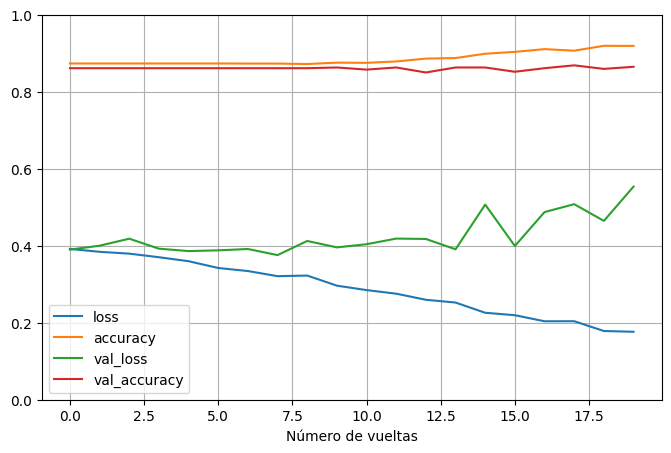

In [38]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)                                  #Establece el rango vertical en [0, 1]
plt.xlabel("Número de vueltas")
plt.show()